<a href="https://colab.research.google.com/github/JeroDeNero/CAP4630/blob/master/CAP4630HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview
Throughout this course, I learned how much data science attributes to machine learning and AI. As someone who started out with no knowledge of how neural networks and machine learning works, there are several subjects in which enlightened on how these computers and programs learn, and work.
<br>
Subjects such as how AI, Machine Learning and Deep Learning relate to each other, Linear Regression, Cross Entropy, Cross Validation, how to apply AI to Real World Concepts, and the basics of Data Engineering.
<br>
Further in the course, I learned techincal applications the mentioned concepts, such as models and its different components, as well as the process of training models and fine-tuning them.

#General Concepts
As mentioned, there were several concepts that I was exposed to, but the one concept that considerably stands out to me is what the word "deep" means in deep learning and what makes it different from other problem solving methods.
<br>
To summaraize, deep learning is sub category of machine learning. Deep learning consists of using layers of neural networks to represent data. This leads into the meaning of "deep" in deep learning. The word deep a is reference to the multiple layers that make up a neural network and allow for machine learning to take place.

#Basic Concepts
There are a handful of concepts that were talked about throughout the class, one such concept is Linear Regression. The math behind Linear Regression is straight forward in the point of view for a computer.
<br>
<br>
$y = \sum w_j x_j^i + b$
<br>
<br>
Linear Regression, is used to model the relationship between two variables such that future values can be predicted and calculated.
<br>
<br>

https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-#scrollTo=SUa3UH9EdFR-&line=3&uniqifier=1


In [0]:
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

The next concept that was covered is Logistic Regression, which is used to model probabilities of a class, such as classification. If the data pass or fails in said class. Logistic Regression was then extended to model multiple classes to the point that the computer could predict whether the picture was showing a specific number or not.
<br>
<br>
$\delta(z) = \frac{1}{1 + e^{-z}}$
<br>
<br>
The following concept after Logistic Regression was Gradient Descent. It's defined to be an iterative algorithm that's used to find a local minimum of a differentiable function. The steps in order to achieve this, defined by the book 'Deep Learning with Python' by Francois Chollet, is "build a loss function that maximizes the value of a given filter in a given convolution layer, and then you'll use stochastic gradient descent to adjust the values of the input image so as to maximize this activation value" (Page 167).
<br>
https://colab.research.google.com/drive/1HKqDUSuiUS2XWGwqvWrSiEDNV_X5rgxZ#scrollTo=4qdxWI1aUG80&line=3&uniqifier=1


In [0]:
def logistic_regression(train_data, test_data, train_labels, test_labels, epochs, lr):
  train_x = np.column_stack((np.ones((np.array(train_data).shape[0], 1)), np.array(train_data))) #formatting the training data
  train_y = np.array(train_labels) #formatting the training labels

  test_x = np.column_stack((np.ones((np.array(test_data).shape[0], 1)), np.array(test_data))) #formatting the testing data
  test_y = np.array(test_labels) #formatting the testing labels

  new_weights = np.zeros((train_x.shape[1], 1)) #creating an array to hold the new weights

  #calculating the loss and accuracy for each epoch, then outputting it
  for epoch in range(epochs):
    loss = 0
    m = train_x.shape[0]
    shuffled_indicies = np.random.permutation(m)

    #this impliments the sigmoid function
    for i, (data, labels) in enumerate(zip(train_x, train_y)):
      z = data.dot(new_weights)
      sigmoid = 1 / (1 + np.exp(-z))

      gradient = (1 / m) * np.array([(sigmoid - labels) * data]).T
      new_weights -= (gradient * lr)

    z = test_x.dot(new_weights)
    sigmoid = 1 / (1 + np.exp(-z))
    test_size = test_y.shape[0]

    #calculating the loss
    loss = ((-test_y * np.log(sigmoid) - ((1 - test_y) * np.log(1 - sigmoid)))).sum()
    loss *= (1 / test_size)

    accuracy = 0
    for predict, actual in zip(sigmoid, test_y):
      predicted = np.rint(predict)
      if predicted == actual:
        accuracy += (1 / test_size)
    print("Loss {}, Accuracy {}".format(loss, accuracy))
  
  display_true_and_separating_line(train_data, train_labels, x, y, separating)

  return new_weights

#Building a Model
To build a model, there are several components and steps that make up the model. Such components include a convolutional network, compiling, training and finetuning.
<br>
####Convolutional Network
To begin, a Convolutional Network is defined to be a class of deep neural networks, which are applied to analyzing images, slowly learning through algorithms and applied classes. This then also ties into how Logistic Regression can be applied to models and deep learning.
<br>
A Convolutional Network is made up of Data, and a Kernel. The Kernel is then applied to the Data through a process of Max Pooling.
<br>
#####Max-Pooling
Max-Pooling is the process of using an input, such as an image like in Homework 5, and down-sizing its dimensions in order for features to be assessed by the kernel. Such examples include a 4 by 4 matrix that gets down-sized to a 2 by 2 matrix which contains features.
<br>
https://colab.research.google.com/drive/16oYcTrVvQftjW3g-wzDOCOqltqsaaU1E#scrollTo=SSQzZUgYzdbq&line=1&uniqifier=1

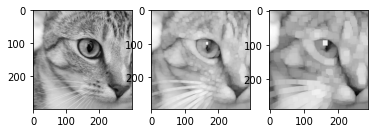

In [0]:
import numpy as np
import skimage.data
import matplotlib.pyplot as plt
import math

input_mat = skimage.data.chelsea()
input_mat = skimage.color.rgb2gray(input_mat)

def maxpooling2d(input_mat, scalar, stride = 1):
  #Ensures that the input matrix isn't a numpy array
  try:
    input_matx = np.array(input_mat)
    a, b = input_matx.shape
  except:
    raise Exception("Error: The input matrix cannot be converted into a numpy array.")

  #Ensuring that input is not empty
  if(input_matx.shape == 0):
    print("Error: The input or kernel matrices are empty.")

  #Ensuring that scalar is larger than the dimensions of input
  if(a < scalar or b < scalar):
    raise Exception("Error: The scalar is larger than the dimensions of the input")

  #Creates an output matrix with dimensions based off the input matrix, and ensuring that that the width and height are equal
  output_dim = np.ceil((a - scalar + 1) / stride).astype(int)
  output_mat = np.zeros(shape = (output_dim, output_dim))

  #A for loop that creates the output matrix with the max of the input matrix and the scalar and stride
  for i in range(output_dim):
    x = stride * i
    for j in range(output_dim):
      y = stride * j
      output_mat[i, j] = np.max(input_matx[x: scalar + x, y: scalar + y])

  return output_mat

maxpool_0 = maxpooling2d(input_mat, 1)
maxpool_1 = maxpooling2d(input_mat, 7)
maxpool_2 = maxpooling2d(input_mat, 14)

maxpool_out = plt.figure()
maxpool_out.add_subplot(1, 3, 1)
plt.imshow(maxpool_0, cmap = 'gray')
maxpool_out.add_subplot(1, 3, 2)
plt.imshow(maxpool_1, cmap = 'gray')
maxpool_out.add_subplot(1, 3, 3)
plt.imshow(maxpool_2, cmap = 'gray')

#Compiling a Model
Compiling a model is straigh forward, it consists of several components, such as the loss function and an optimizer with a learning rate.
####Loss Function
There are a few loss functions that were covered this semester, but the two that really stood out to me were Cross Entropy and the Mean-Squared Error(MSE) Loss functions. Depending on what was being calculated, Cross Entropy would give a value between 0 and 1, whereas Mean Squareed Error would be an optimal choice for regression.
####Learning Rate
As for the learning rate, when given a smaller value, the accuracy increases because it runs in more smaller increments and thus resulting in a more accurate approximation.
<br>
https://colab.research.google.com/drive/16oYcTrVvQftjW3g-wzDOCOqltqsaaU1E#scrollTo=DzFKL7et-q0v&line=35&uniqifier=1

In [0]:
model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

#Training a Model
When it comes to training a model, there are several factors that can increase and decrease its accuracy such as the number epochs, Batch Size, validation steps, and the optimizers.
####Epoch
An epoch is an iteration or a representation of the data that is given as input, wich is then used as input for the next epoch. Therefore, the more epochs in training, the more accurate the output will be.
####Batch Size
A Batch Size, also known as Steps per Epoch, is the amount of data points that are being used per epoch. The larger the Batch Size, the faster the training will go, but the less accurate it becomes. Therefore, the smaller the batch size is, the better accuracy the training will output, but will take longer.
<br>
https://colab.research.google.com/drive/16oYcTrVvQftjW3g-wzDOCOqltqsaaU1E#scrollTo=DzFKL7et-q0v&line=35&uniqifier=1

In [0]:
#Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

#Fine-tuning a Pretrained Model
Within deep learning, fine-tuning is the process of training a model against a dataset, then running that trained model against another dataset, similar to the first. In doing this, the model becomes more precise and dynamic when reading input data.
<br>
https://colab.research.google.com/drive/16oYcTrVvQftjW3g-wzDOCOqltqsaaU1E#scrollTo=-c7ELjtu_9RA&line=24&uniqifier=1

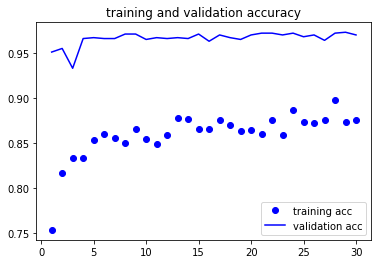

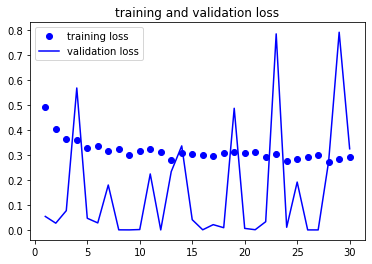

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

#Training and Validation loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

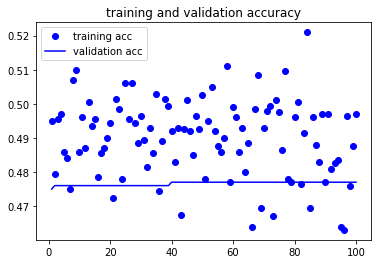

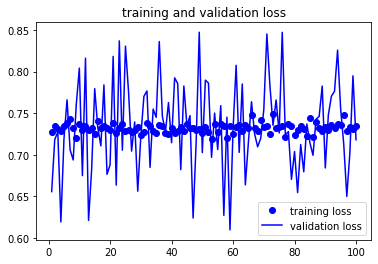

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

# training and validation loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()